In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score, precision_score

In [2]:
usd_inr=pd.read_csv('Datasets/USD-INR Exchange rate 2019_2021.csv')
cog_share=pd.read_csv('Datasets/Cognizant share prices 2019_2021.csv')
HCL_tech=pd.read_csv('Datasets/HCL Technologies share prices 2019_2021.csv')
HDFC=pd.read_csv('Datasets/HDFC Bank Share Prices 2019_2021.csv')
ICICI=pd.read_csv('Datasets/ICICI Bank Share Prices 2019_2021.csv')
Infosys=pd.read_csv('Datasets/Infosys Share Prices 2019_2021.csv')
SBI=pd.read_csv('Datasets/SBI Share Prices 2019_2021.csv')

In [3]:
print("usd_inr\n",usd_inr.sample(5))
print("\n Infosys\n",Infosys.sample(5))
print("\nICICI\n",ICICI.sample(5))

usd_inr
            Date       Open       High        Low      Close  Adj Close
17   2019-01-24  71.157303  71.300003  70.940002  71.157303  71.157303
586  2021-03-31  73.445297  73.612999  73.050003  73.445297  73.445297
291  2020-02-12  71.275497  71.474998  71.064003  71.275299  71.275299
136  2019-07-10  68.555496  68.764999  68.292503  68.764999  68.764999
626  2021-05-26  72.804901  72.808403  72.626801  72.804901  72.804901

 Infosys
            Date         Open         High          Low        Close  \
4    2020-10-09  1095.099976  1113.300049  1088.449951  1106.800049   
130  2021-04-13  1433.000000  1435.250000  1375.000000  1397.150024   
215  2021-08-16  1707.699951  1719.949951  1690.099976  1704.400024   
155  2021-05-21  1347.500000  1357.500000  1346.349976  1354.500000   
196  2021-07-19  1544.699951  1552.900024  1537.550049  1541.699951   

         Volume  
4    10567867.0  
130  14855206.0  
215   4564109.0  
155   4969733.0  
196   5669162.0  

ICICI
            

In [4]:
print("usd_inr is null values\n",usd_inr.isna().sum())
print("\n Infosys is null values\n",Infosys.isna().sum())
print("\nICICI is null values\n",ICICI.isna().sum())

usd_inr is null values
 Date          0
Open         21
High         21
Low          21
Close        21
Adj Close    21
dtype: int64

 Infosys is null values
 Date      0
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

ICICI is null values
 Date      0
Open      2
High      2
Low       2
Close     2
Volume    2
dtype: int64


In [5]:
print("usd_inr description results\n",usd_inr.describe())
print("\n Infosys description results\n",Infosys.describe())
print("\n ICICI description results\n",ICICI.describe())
print("\n cog_share description results\n",cog_share.describe())

usd_inr description results
              Open        High         Low       Close   Adj Close
count  699.000000  699.000000  699.000000  699.000000  699.000000
mean    72.735375   72.979156   72.469366   72.752239   72.752239
std      2.114753    2.137857    2.052748    2.082940    2.082940
min     68.443001   68.529999   68.202301   68.367599   68.367599
25%     71.153652   71.381252   70.931000   71.174999   71.174999
50%     73.091499   73.324799   72.899300   73.092003   73.092003
75%     74.317551   74.514500   74.079300   74.306648   74.306648
max     77.684998   77.754997   76.496300   77.570000   77.570000

 Infosys description results
               Open         High          Low        Close        Volume
count   248.000000   248.000000   248.000000   248.000000  2.480000e+02
mean   1383.299196  1397.058063  1369.331857  1383.390126  8.071237e+06
std     198.642641   198.723015   199.211326   199.111287  4.658320e+06
min    1018.049988  1054.900024  1018.049988  1048.699951 

In [6]:
company_list = [HCL_tech, HDFC, ICICI, Infosys, SBI, usd_inr, cog_share]
tech_list = company_name = ['HCL', "HDFC", "ICICI", "INFOSYS", "SBI", "USD", "COGNIZANT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    company['Date'] = pd.to_datetime(company['Date'])
    
df = pd.concat(company_list, axis=0)

In [7]:
for i in company_list:
    print(i.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')


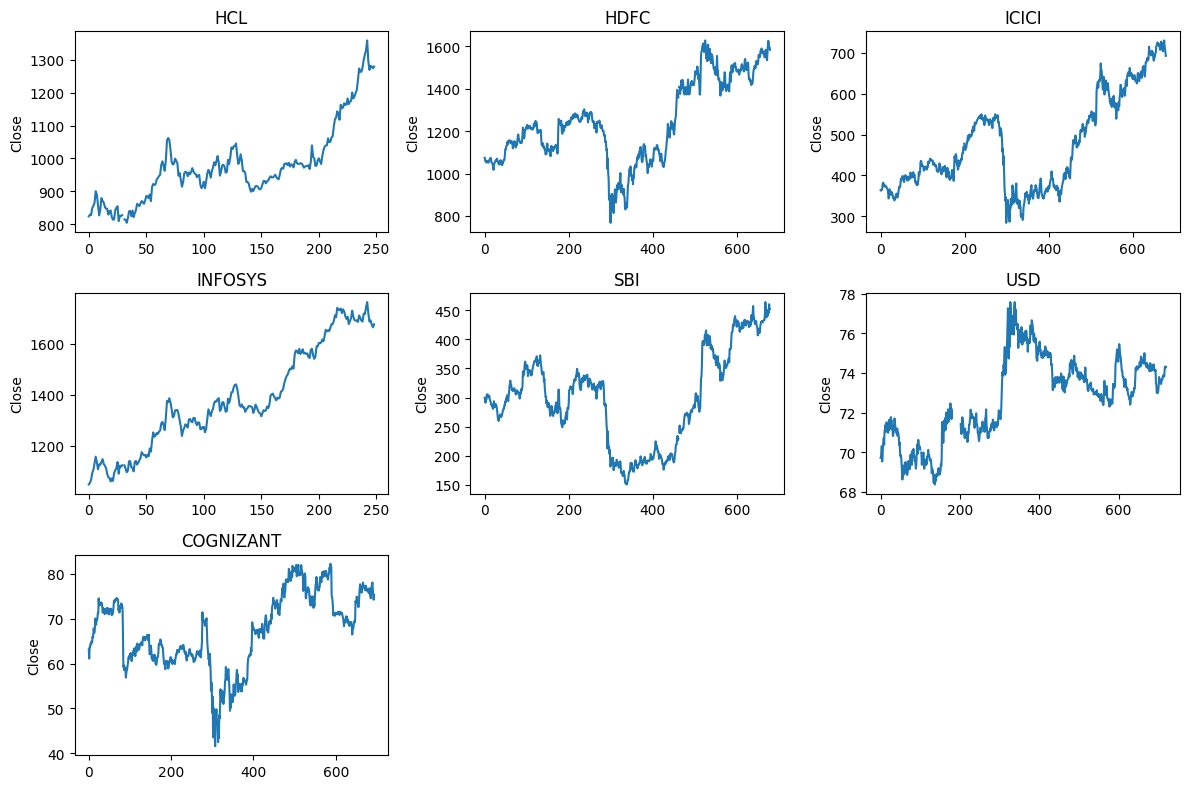

In [8]:
# plt.figure(figsize=(20, 10))
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(3, 3, i+1)
    plt.plot(company['Close'])
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{company_name[i]}")
plt.tight_layout()

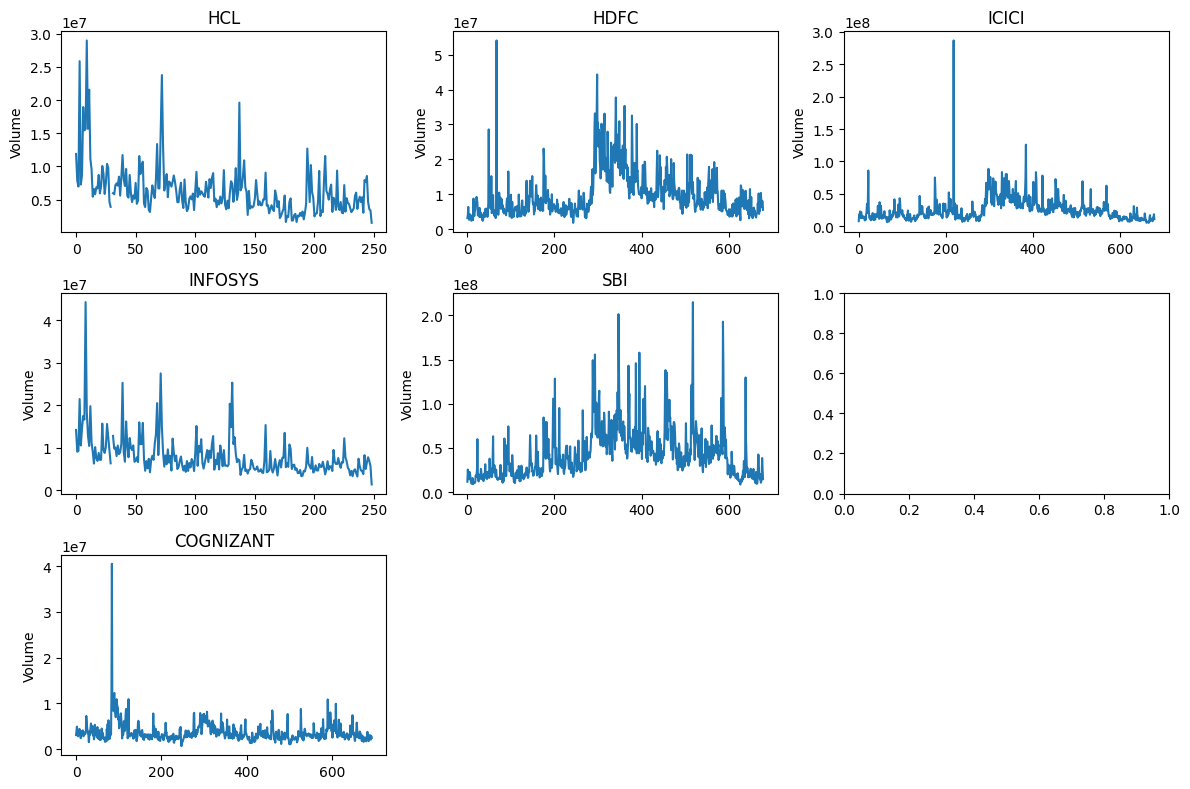

In [9]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    try: 
      plt.subplot(3, 3, i)
      company['Volume'].plot()
      plt.ylabel('Volume')
      plt.xlabel(None)
      plt.title(f"{tech_list[i - 1]}")
    except:
      pass
plt.tight_layout()

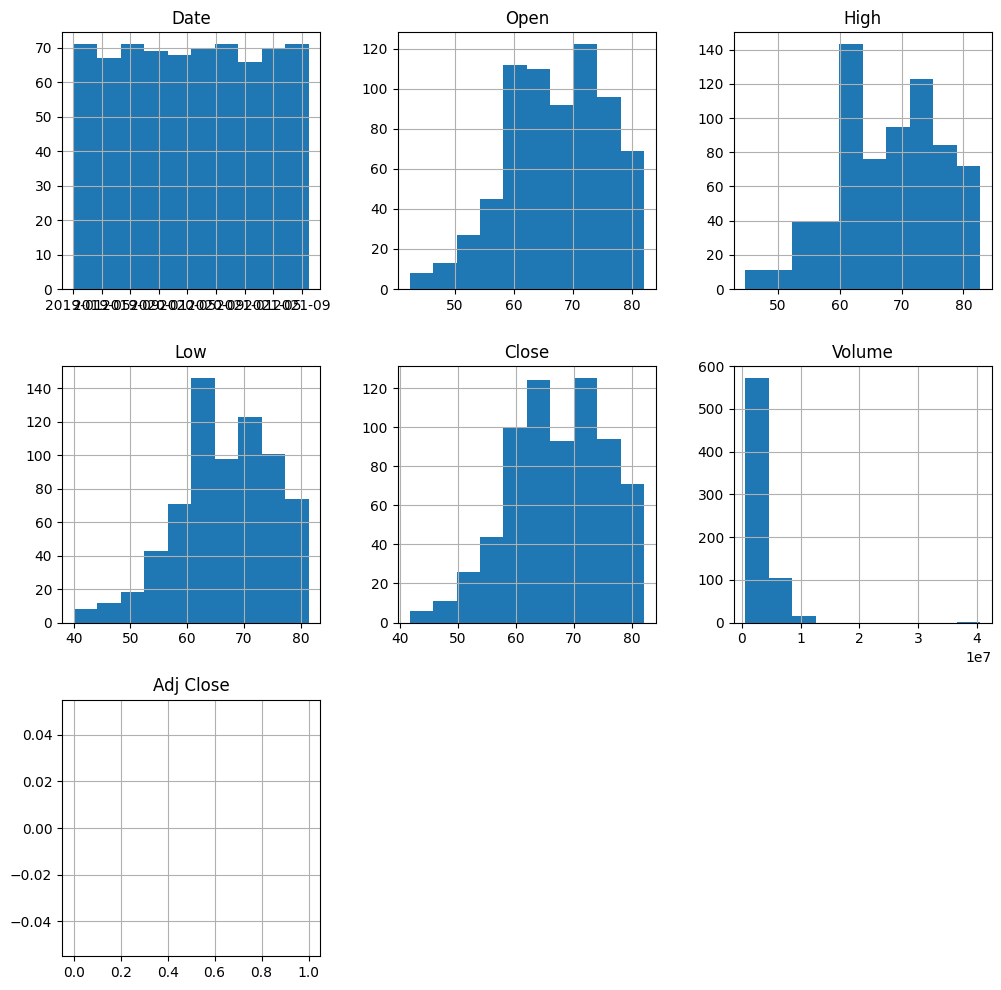

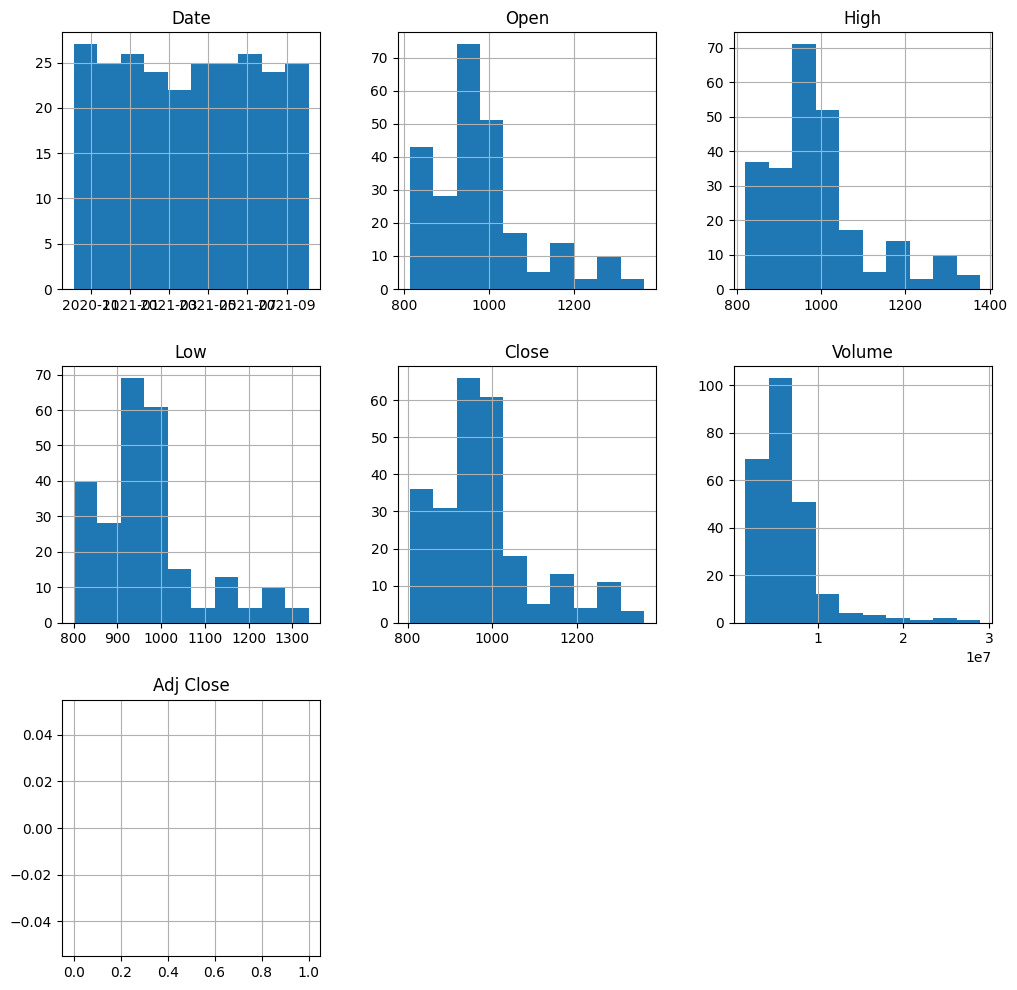

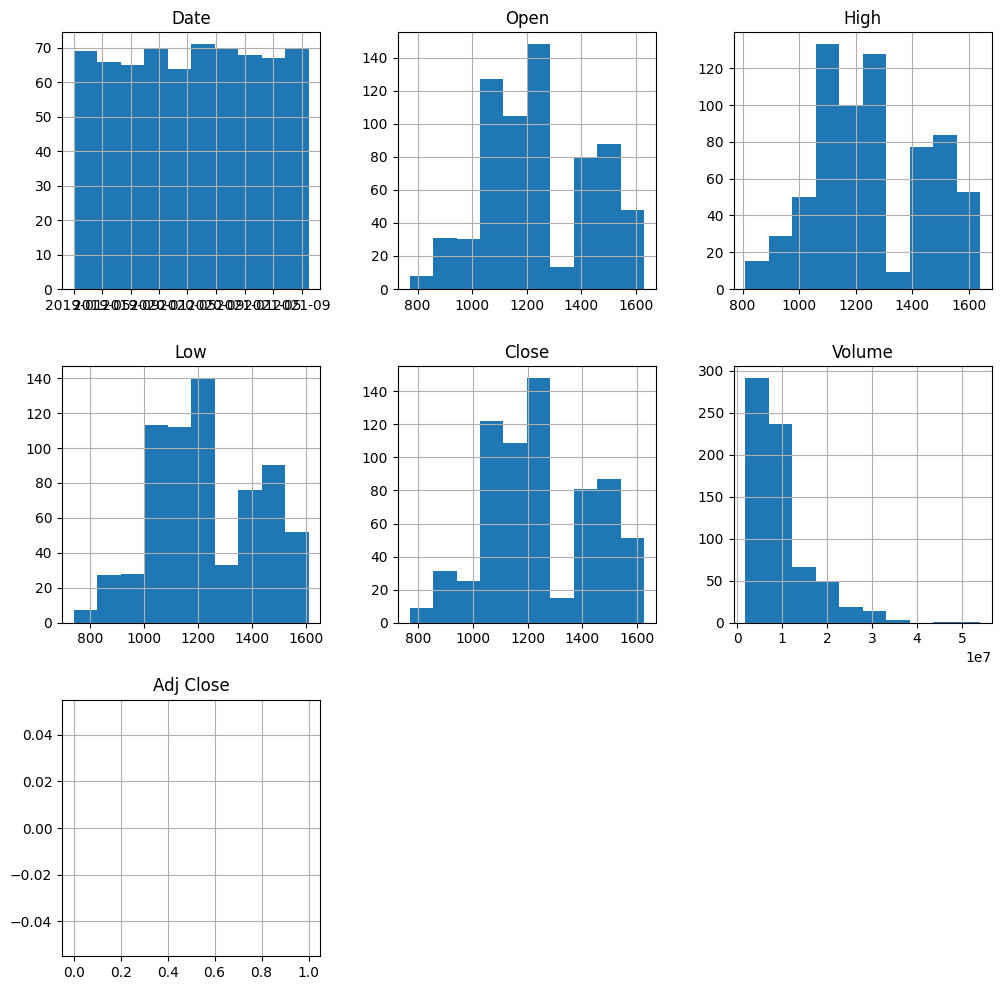

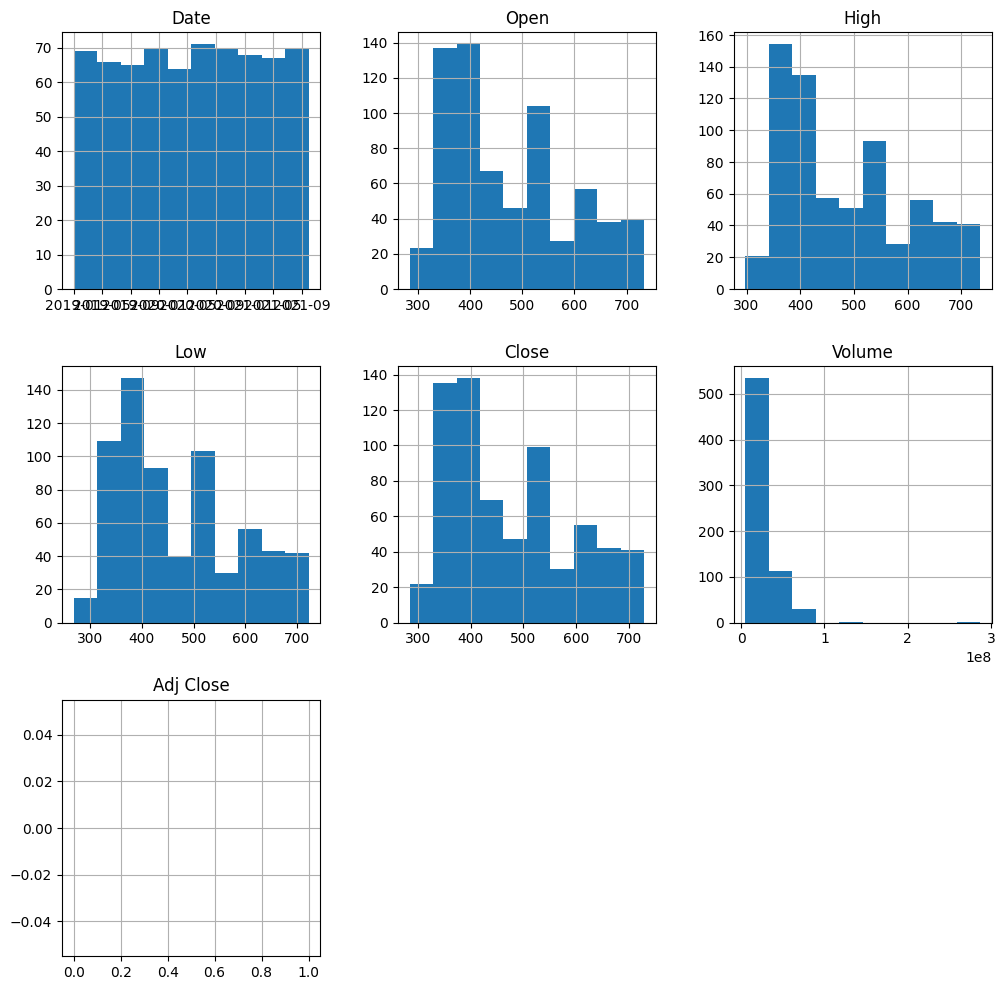

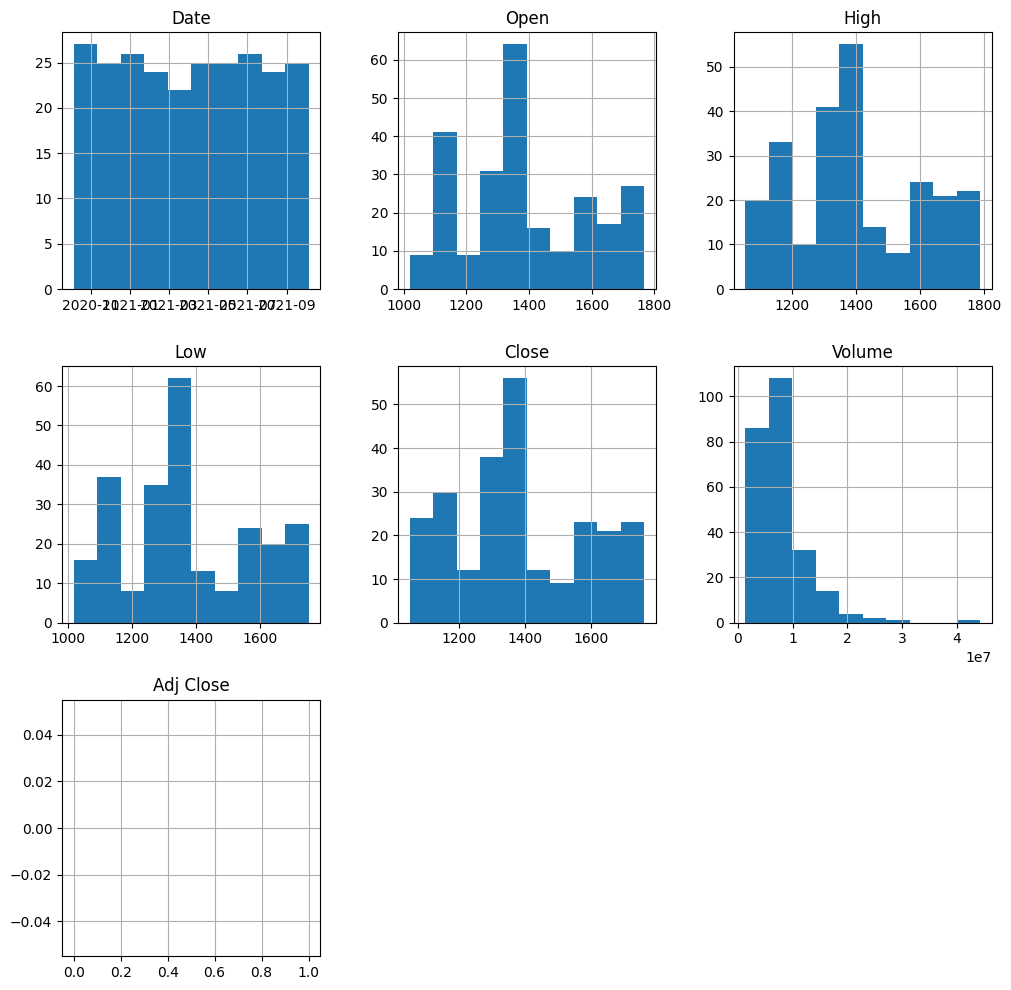

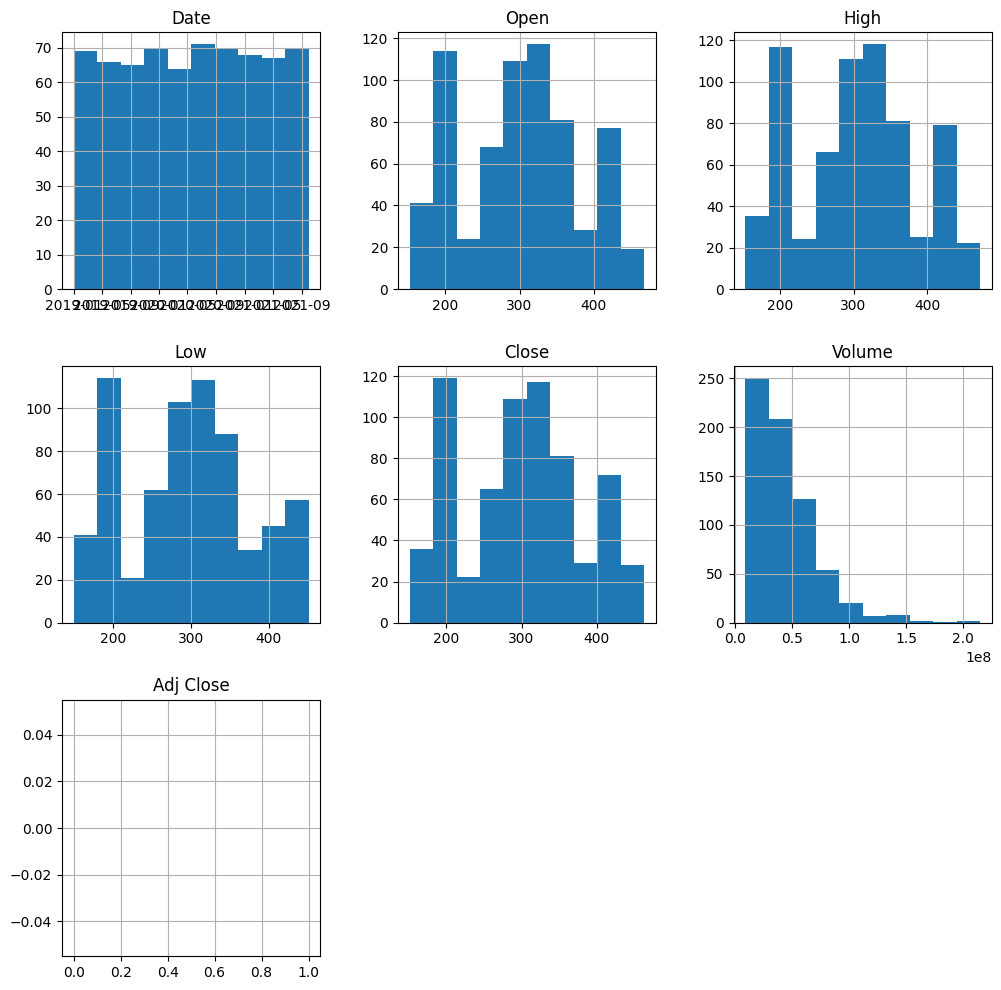

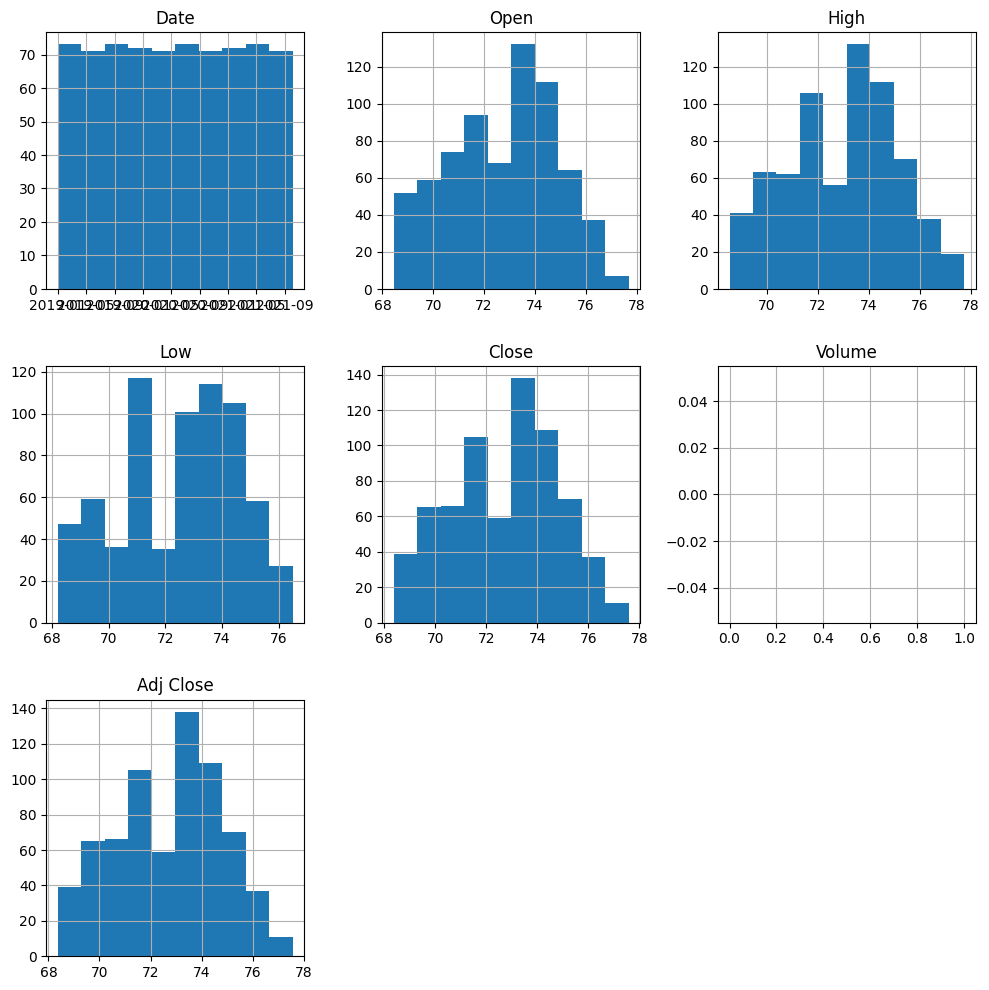

In [10]:
df.groupby("company_name").hist(figsize=(12, 12));

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

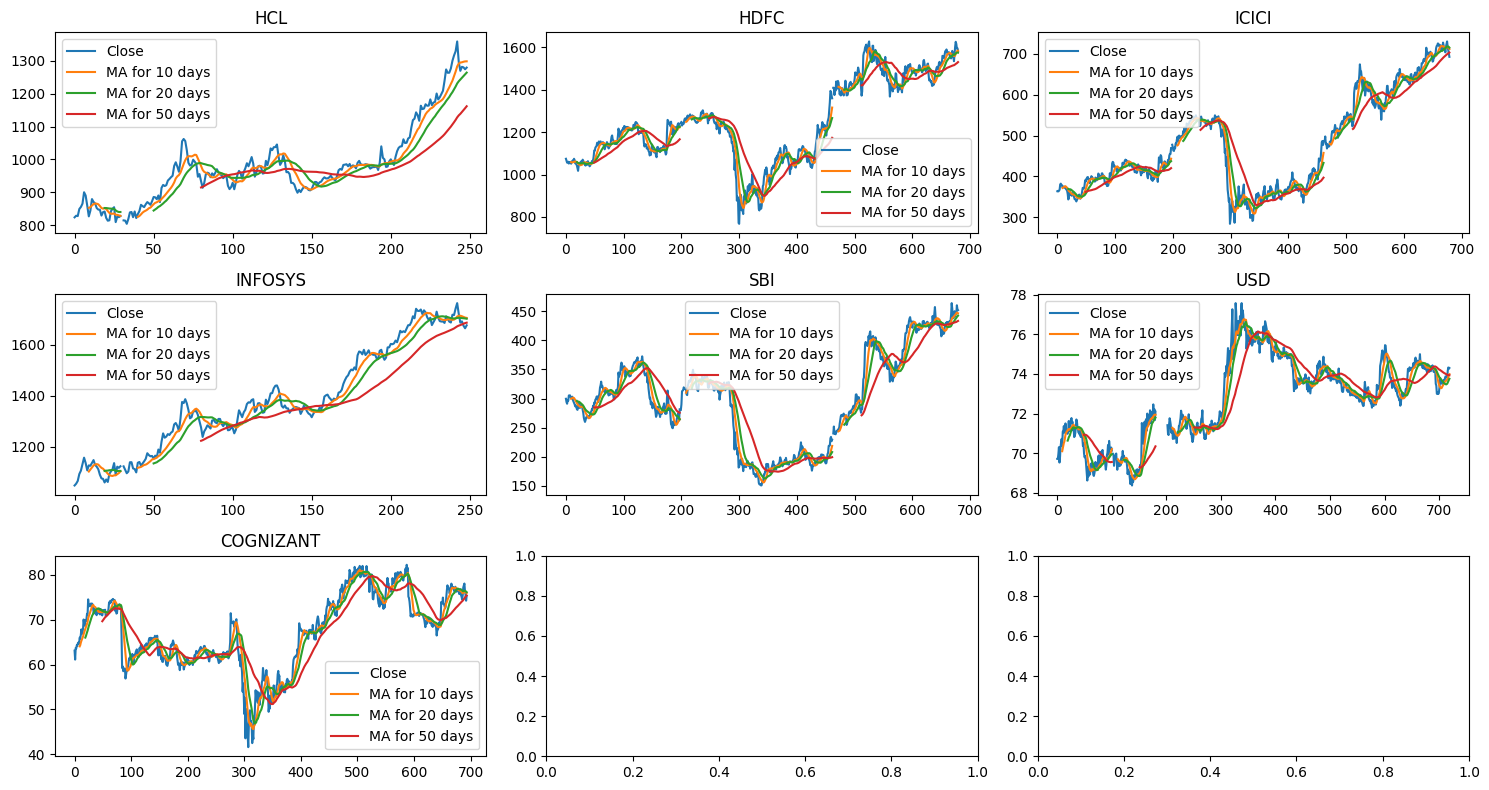

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)
for i, comp in enumerate(company_list):
  comp[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[int(i/3),i%3])
  axes[int(i/3),i%3].set_title(company_name[i])


fig.tight_layout()

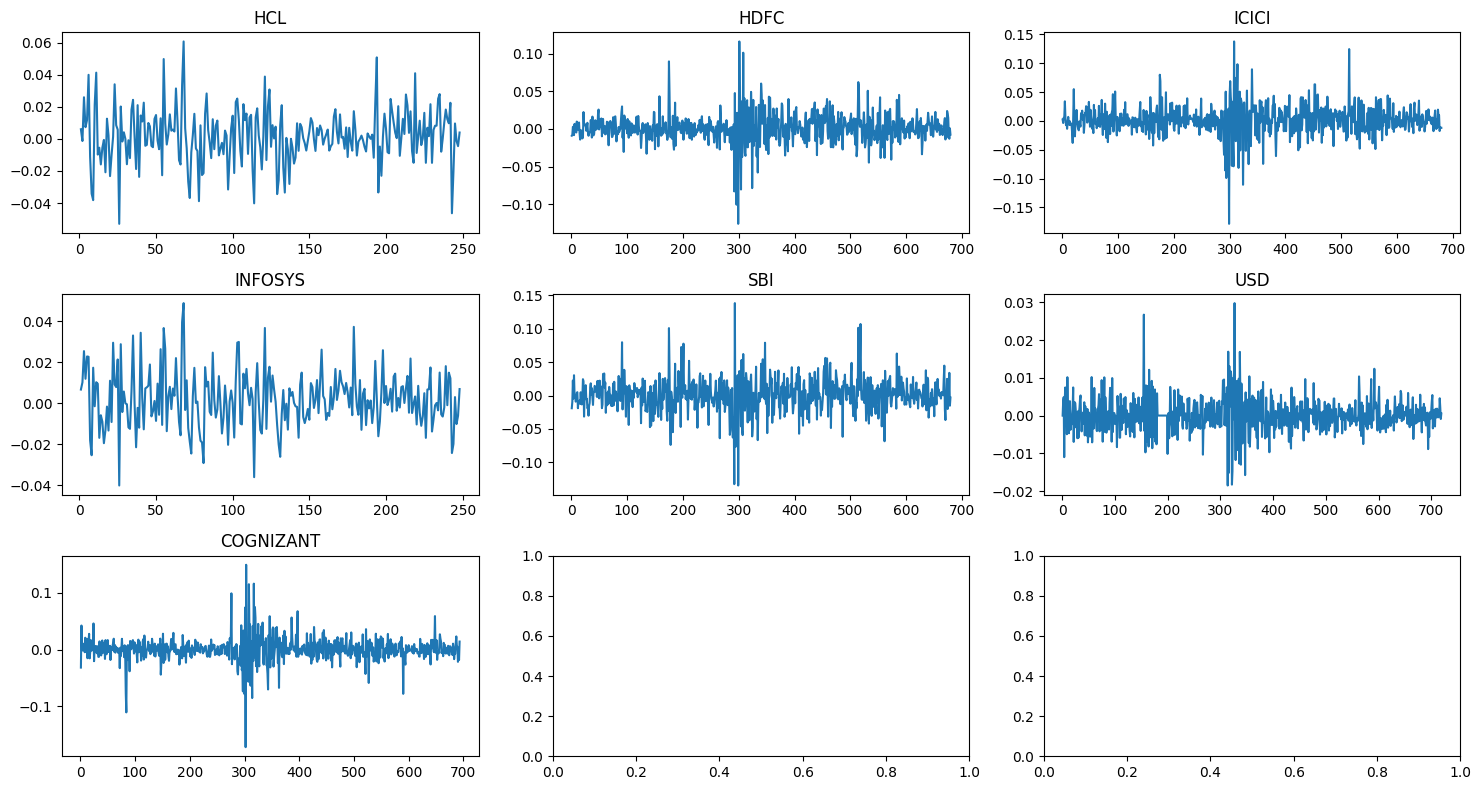

In [13]:
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

for i, comp in enumerate(company_list):
  comp['Daily Return'].plot(ax=axes[int(i/3),i%3])
  axes[int(i/3),i%3].set_title(company_name[i])


fig.tight_layout()

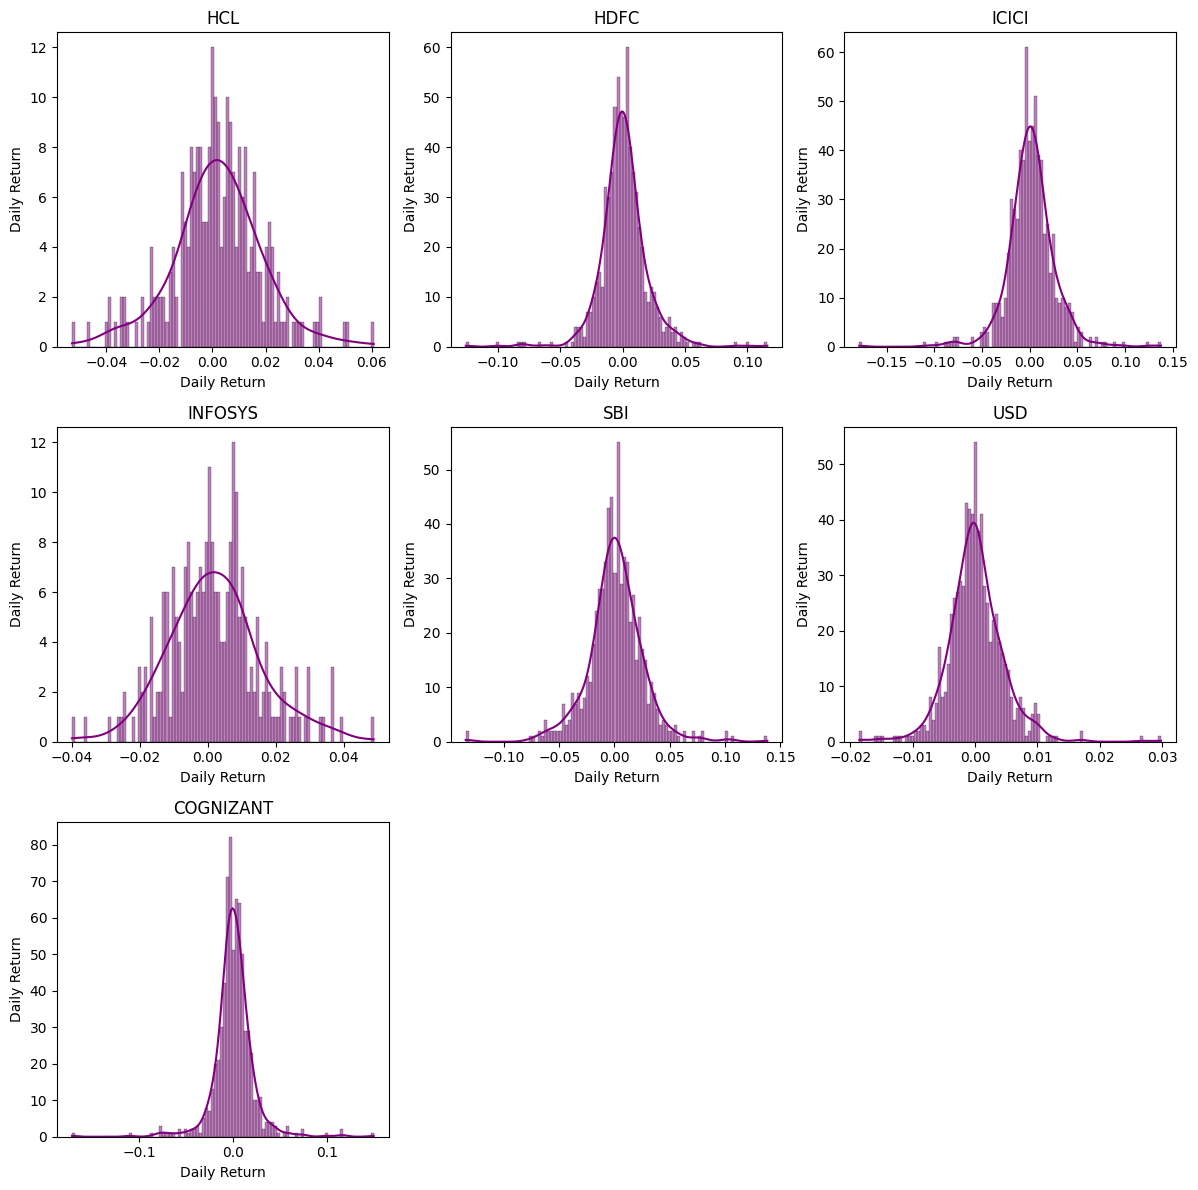

In [14]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    sn.histplot(company['Daily Return'].dropna(),kde=True, bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

In [15]:
close_list = []
for i, comp in enumerate(company_list):
   comp = comp.rename(columns={'Close': 'Close_{}'.format(company_name[i])})
   close_list.append(comp[['Date', 'Close_{}'.format(company_name[i])]])
   

In [16]:
from functools import reduce
closing_df = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), close_list).set_index("Date")
closing_df.head() 

,Close_HCL,Close_HDFC,Close_ICICI,Close_INFOSYS,Close_SBI,Close_USD,Close_COGNIZANT
Date,,,,,,,
2020-10-05,824.200012,1114.349976,373.100006,1048.699951,188.750000,73.322403,70.930000
2020-10-06,829.150024,1144.099976,380.600006,1055.750000,191.600006,73.108299,69.830002
2020-10-07,828.049988,1162.250000,382.649994,1066.550049,190.699997,73.815002,72.239998
2020-10-08,849.549988,1191.800049,387.500000,1093.699951,191.500000,73.542503,72.910004
2020-10-09,855.750000,1233.550049,401.500000,1106.800049,198.300003,73.280502,73.080002


<AxesSubplot: >

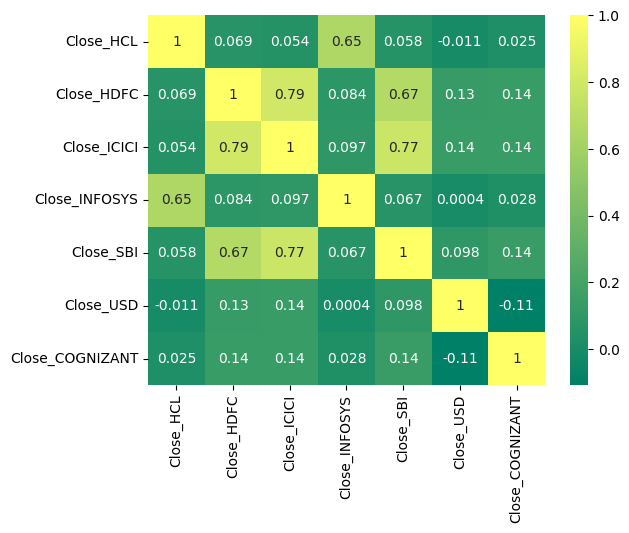

In [17]:
tech_rets = closing_df.pct_change()
sn.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot: >

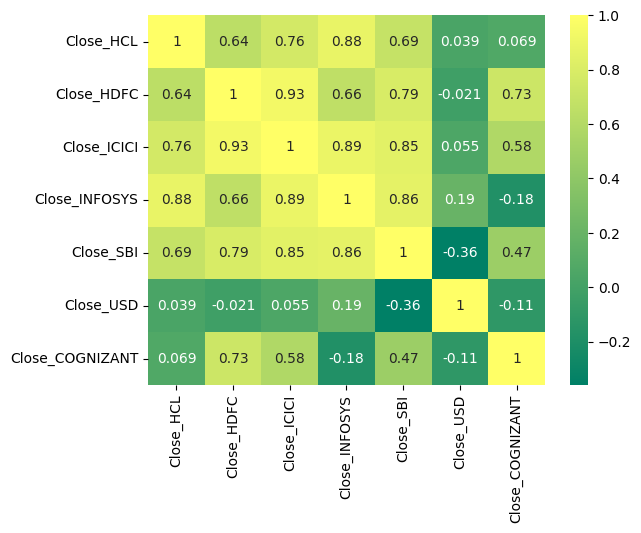

In [18]:
sn.heatmap(closing_df.corr(), annot=True, cmap='summer')

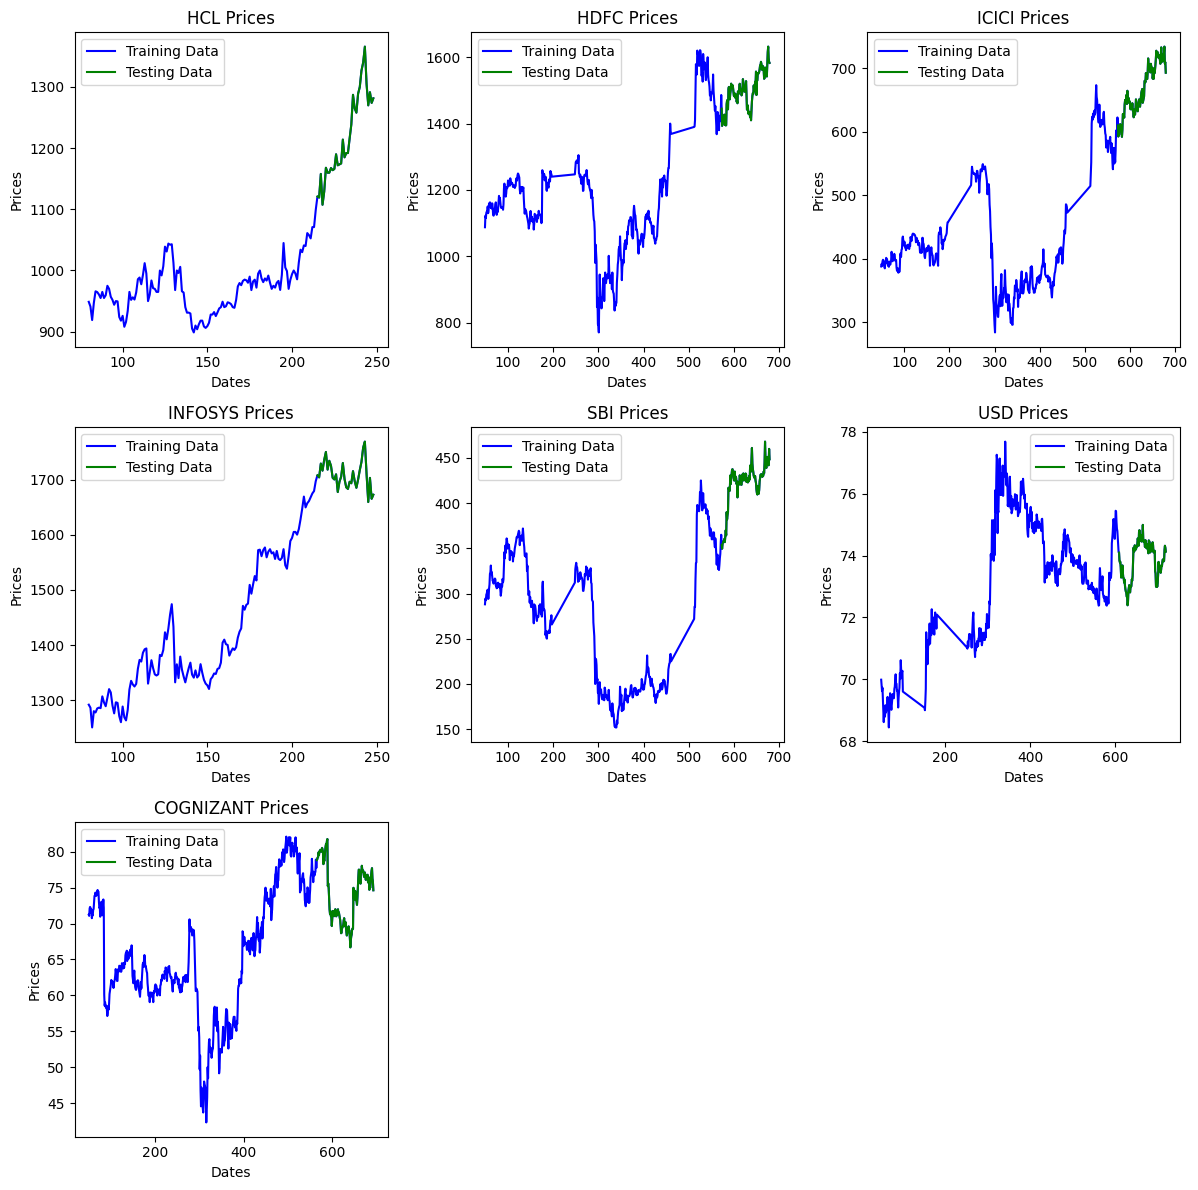

In [19]:
plt.figure(figsize=(12, 12))

for i, df in enumerate(company_list, 1):
  plt.subplot(3, 3, i)
  df = df.dropna()
  train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
  plt.title('{} Prices'.format(company_name[i-1]))
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.plot(df['Open'], 'blue', label='Training Data')
  plt.plot(test_data['Open'], 'green', label='Testing Data')
  # plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
  plt.legend()
plt.tight_layout()

In [20]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11608\2117343544.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
C:\Users\KIIT\AppData\Local\Temp\ipykernel_11608\2117343544.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds
C:\Users\KIIT\AppData\Local\Temp\ipykernel_11608\2117343544.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argu

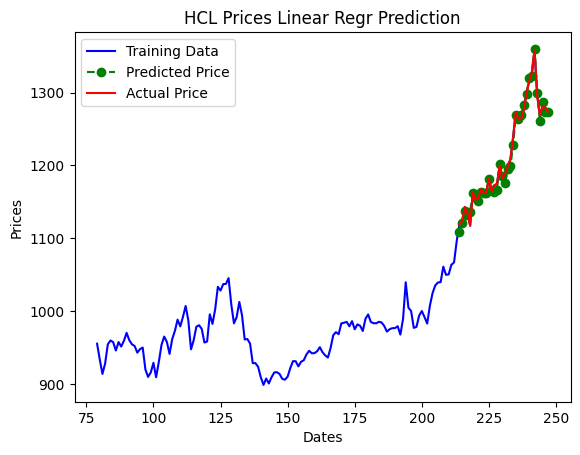

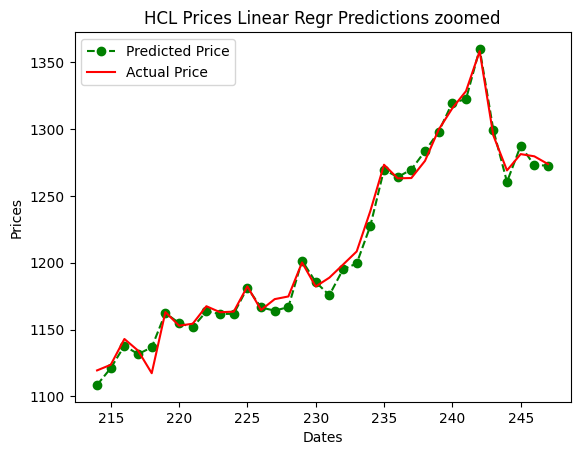

In [21]:
#### LINEAR REGRESSION
df = HCL_tech
cols = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']
df[cols] = df[cols].shift(-1)
df = df.dropna()
train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

x_train = train.drop(['Close', 'Date', 'company_name'], axis=1)
y_train = train['Close']
x_valid = valid.drop(['Close', 'Date', 'company_name'], axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
np.round(rms,3)

valid['Predictions'] = 0
valid['Predictions'] = preds

plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices Linear Regr Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices Linear Regr Predictions zoomed')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11608\1316300042.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Close'], 'green', color='blue', label='Training Data')


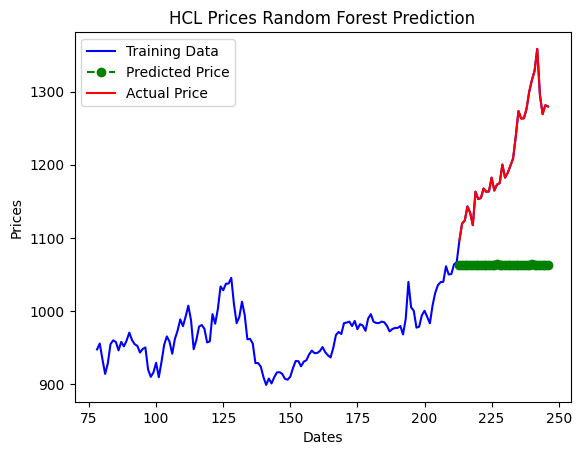

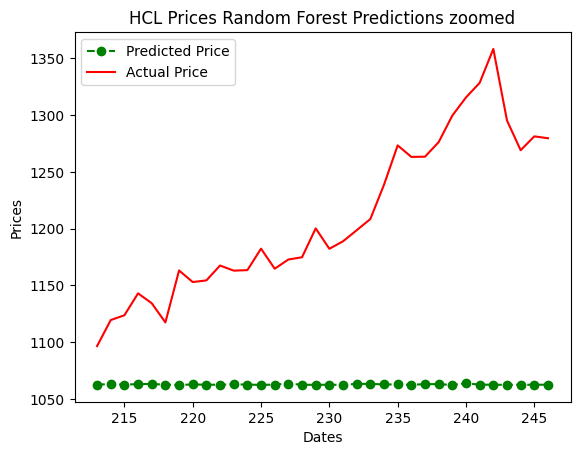

In [22]:
#### Random Forest
df = HCL_tech
cols = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']
df[cols] = df[cols].shift(-1)
df = df.dropna()
train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

x_train = train.drop(['Close', 'Date', 'company_name'], axis=1)
y_train = train['Close']
x_valid = valid.drop(['Close', 'Date', 'company_name'], axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
np.round(rms,3)

plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices Random Forest Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

# plt.figure(figsize=(12,7))
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices Random Forest Predictions zoomed')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [23]:
#### Random Forest
df = HCL_tech
cols = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']
df[cols] = df[cols].shift(-1)
df = df.dropna()
train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

x_train = train.drop(['Close', 'Date', 'company_name'], axis=1)
y_train = train['Close']
x_valid = valid.drop(['Close', 'Date', 'company_name'], axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train,y_train)
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
np.round(rms,3)

plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices SVR Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

# plt.figure(figsize=(12,7))
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices SVR Predictions zoomed')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

"#### Random Forest\ndf = HCL_tech\ncols = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']\ndf[cols] = df[cols].shift(-1)\ndf = df.dropna()\ntrain, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]\n\nx_train = train.drop(['Close', 'Date', 'company_name'], axis=1)\ny_train = train['Close']\nx_valid = valid.drop(['Close', 'Date', 'company_name'], axis=1)\ny_valid = valid['Close']\n\n#implement linear regression\nfrom sklearn.svm import SVR\nmodel = SVR(kernel='linear')\nmodel.fit(x_train,y_train)\npreds = model.predict(x_valid)\nrms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))\nnp.round(rms,3)\n\nplt.plot(df['Close'], 'green', color='blue', label='Training Data')\nplt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', \n         label='Predicted Price')\nplt.plot(valid.index, valid['Close'], color='red', label='Actual Price')\nplt.title('HCL Prices SVR Prediction')\nplt.xlabel('Dates')\nplt.ylabel('Prices')\nplt.legend

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11608\1202102644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
C:\Users\KIIT\AppData\Local\Temp\ipykernel_11608\1202102644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


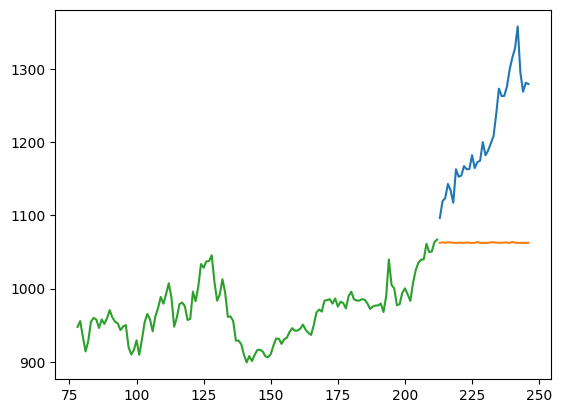

In [24]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [25]:
for i, df in enumerate(company_list):
  train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
  print(company_name[i], train.shape, valid.shape)

HCL (199, 11) (50, 11)
HDFC (544, 11) (136, 11)
ICICI (544, 11) (136, 11)
INFOSYS (199, 11) (50, 11)
SBI (544, 11) (136, 11)
USD (576, 11) (144, 11)
COGNIZANT (555, 11) (139, 11)
